<a href="https://colab.research.google.com/github/Mezirix/AIDA-Saskpoly/blob/main/Q_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
The code is implementing Q-learning for a taxi navigation problem, where the goal is for the taxi (represented in a 2D grid world) to:

* Pick up a passenger.

* Drop them off at a destination.

The code uses Q-learning to train the agent (taxi) and renders the environment

**Step 1: Setting Up the Environment**

We first import the necessary libraries:

In [ ]:
!pip install gym

Install a Rendering Library: This helps us for display

In [ ]:
!apt-get install -y xvfb ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install gym pyvirtualdisplay

Implementation for Heat Map Visualization

In [44]:
!pip install seaborn


Then, set up the virtual display

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


In [45]:
import numpy as np
import gym
import pandas as pd  # Importing Pandas for tabular display
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
import seaborn as sns  # For heat map visualization

NumPy: Helps with math operations.

Gym: Provides the Taxi environment.

Matplotlib: Allows us to plot the results.

IPython.display: It’s used to create smooth
animations of the taxi's movements.

pyvirtualdisplay:  helps render the visual output of the Taxi-v3 environment in Colab,



**Next, we set up the Taxi environment:**

In [ ]:
env = gym.make("Taxi-v3")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**Step 2: Understanding the Taxi Scenario**

In the Taxi environment:

- The taxi starts in a random location.
- It must pick up a passenger from one location and drop them off at another.
- The taxi gets rewards for doing this correctly and penalties for wrong moves (like trying to drop off a passenger in the wrong location).

**Step 3: Q-Learning Algorithm**

Now, let’s define the key components of our Q-Learning algorithm:

- Q-Table: This is a matrix where we store Q-values for every state and action. The taxi uses this table to learn the best moves.
- Learning Rate (α): Controls how much we update Q-values after each step.
- Discount Factor (γ): Tells the taxi how much to value future rewards (e.g., reaching the destination).
- Exploration Rate (ε): Sometimes, the taxi tries random moves to explore the environment, especially when it’s still learning.

In [ ]:
# Initialize Q-Table with zeros (state, action)
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1    # Learning rate
gamma = 0.99   # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of training episodes

In [ ]:
# Initialize list to track success rates
success_rate = []

**Step 4: Training the Taxi Agent**

During training, the taxi learns the best strategy through trial and error by playing thousands of games and updating its Q-values based on the results of each action.

In [ ]:
for episode in range(num_episodes):
  # Reset the environment to start a new episode
    state = env.reset()
    done = False

    success = False  # Track if the agent succeeds in this episode

    while not done:
        # Choose an action:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: choose a random action
        else:
            action = np.argmax(Q[state, :])    # Exploit: choose the action with the highest Q-value

        # Take the action and observe the new state, reward, and whether the episode is done
        new_state, reward, done, _ = env.step(action)

        # Update Q-value using the Bellman Equation
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Transition to the new state
        state = new_state

         # Check if the episode was successful (success occurs when the passenger is dropped off)
        if done and reward == 20:  # A reward of 20 usually signifies success in Taxi-v3
            success = True

    # Track the success rate over episodes
    if success:
        success_rate.append(1)
    else:
        success_rate.append(0)

 # Calculate cumulative success rate over episodes
cumulative_success_rate = np.cumsum(success_rate) / (np.arange(1, num_episodes + 1))
print("Training finished.")



Training finished.


# In this output: We generated the Q-Table

Rows: Represent the states (for example, state 0, state 1, etc.).


Columns: Represent the actions (for example, Action 0 might be "move up", Action 1 might be "move down", etc.).


Values: Represent the expected cumulative reward for taking the given action in that state.

In [ ]:
# Display the Q-table as a Pandas DataFrame
q_table_df = pd.DataFrame(Q, columns=[f'Action {i}' for i in range(env.action_space.n)])
print("Q-Table after training:")
print(q_table_df)

Q-Table after training:
      Action 0   Action 1   Action 2   Action 3   Action 4  Action 5
0     0.000000   0.000000   0.000000   0.000000   0.000000  0.000000
1     7.393306   8.418318   7.229933   8.245992   9.622070 -0.488158
2    11.774444  12.817416  11.773039  12.753683  14.118806  3.926981
3     8.280090   9.502639   8.001884   9.395697  10.729363  0.498578
4    -5.977448  -5.486883   1.151036  -6.106069  -9.809229 -9.615572
..         ...        ...        ...        ...        ...       ...
495   0.000000   0.000000   0.000000   0.000000   0.000000  0.000000
496  -2.563519  -2.610410  -2.567759  10.544182  -2.947452 -2.918848
497   0.489989  15.002679   0.264492   0.237361  -2.827493 -1.999000
498  -2.744895  -1.540580  -2.752534  10.659072  -4.121324 -4.599201
499   2.535402   4.141217   1.556531  18.799998   2.150060  2.294385

[500 rows x 6 columns]


In [42]:
q_table_df

,Action 0,Action 1,Action 2,Action 3,Action 4,Action 5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7.393306,8.418318,7.229933,8.245992,9.622070,-0.488158
2,11.774444,12.817416,11.773039,12.753683,14.118806,3.926981
3,8.280090,9.502639,8.001884,9.395697,10.729363,0.498578
4,-5.977448,-5.486883,1.151036,-6.106069,-9.809229,-9.615572
...,...,...,...,...,...,...
495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,-2.563519,-2.610410,-2.567759,10.544182,-2.947452,-2.918848
497,0.489989,15.002679,0.264492,0.237361,-2.827493,-1.999000
498,-2.744895,-1.540580,-2.752534,10.659072,-4.121324,-4.599201


Render the Environment in Colab

In [ ]:
def render_env(env):
    plt.clf()
    img = env.render(mode='rgb_array')
    plt.imshow(img)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())


**Step 5: Testing the Trained Agent**

After training, we can test how well the taxi performs by using the Q-values it has learned to make decisions.

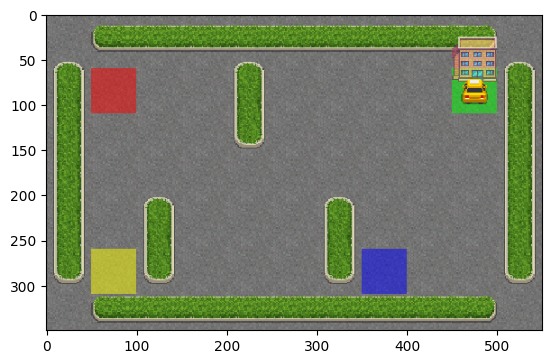

Episode finished.


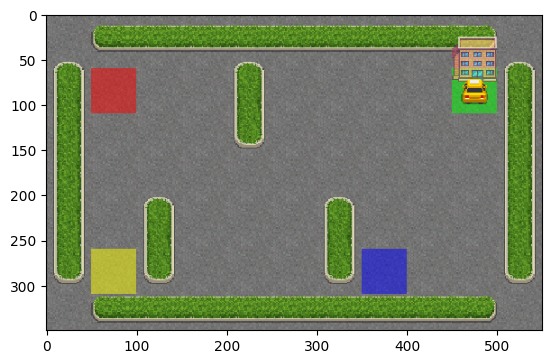

In [ ]:
state = env.reset()
env.render()  # Show the initial state of the taxi


done = False
while not done:
    action = np.argmax(Q[state, :])  # Choose the best action based on Q-values
    state, reward, done, _ = env.step(action)

    if not done:
        render_env(env)  # render function to display the environment in Colab

print("Episode finished.")


**Step 6: Analyzing Results**

We can track how well the taxi improves over time by plotting its performance, showing how many passengers it successfully picks up and drops off over the episodes.

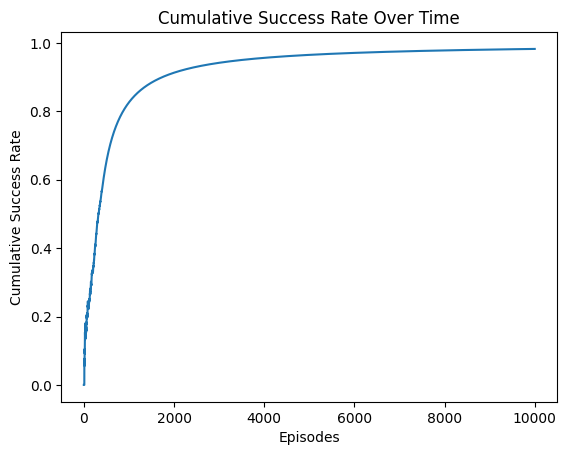

In [ ]:
# Plot success rate over episodes
plt.plot(cumulative_success_rate)
plt.ylabel('Cumulative Success Rate')
plt.xlabel('Episodes')
plt.title('Cumulative Success Rate Over Time')
plt.show()

In [47]:
q_table_df_test = pd.DataFrame(Q)

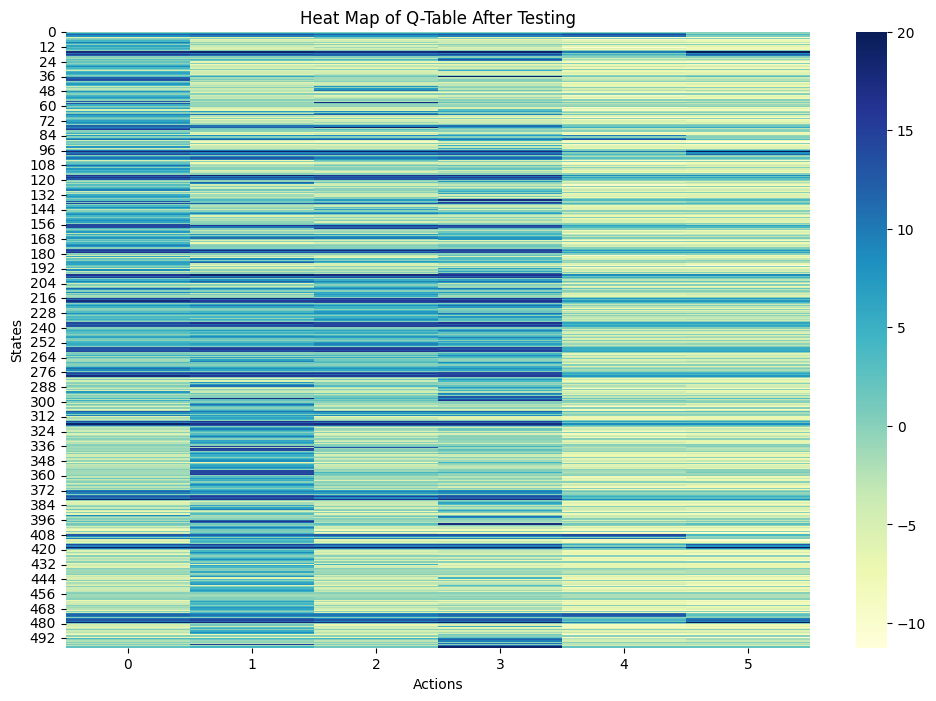

In [48]:
# Generate a heat map to visualize the Q-table after testing
plt.figure(figsize=(12, 8))
sns.heatmap(q_table_df_test, cmap="YlGnBu", annot=False)
plt.title("Heat Map of Q-Table After Testing")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

#Insights Based on the Heat Map:

* Optimal Actions: The heat map highlights which actions are most favorable (highest Q-values) for specific states. The brighter colors indicate that the agent has found these actions to lead to higher future rewards.


* Exploration vs. Exploitation: If the heat map shows a mix of bright and dark regions, it may indicate that the agent is still exploring or has not fully converged on the optimal policy. A more consistent pattern of high Q-values in specific columns suggests the agent is exploiting learned knowledge.


* Action Preferences: If a particular action (e.g., "Action 4") has consistently higher Q-values across many states, it means that the agent has found that action to be useful in multiple scenarios.